In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
797,798,1,3,"Osman, Mrs. Mara",female,31.0,0,0,349244,8.6833,NaN,S
244,245,0,3,"Attalah, Mr. Sleiman",male,30.0,0,0,2694,7.2250,NaN,C
211,212,1,2,"Cameron, Miss. Clear Annie",female,35.0,0,0,F.C.C. 13528,21.0000,NaN,S
45,46,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.0500,NaN,S
204,205,1,3,"Cohen, Mr. Gurshon ""Gus""",male,18.0,0,0,A/5 3540,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.shape

(891, 12)

In [6]:
df.size

10692

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.isnull().sum() * 100 / len(df)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.duplicated().sum()

0

In [11]:
num_df = df.select_dtypes([int,float])
num_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [12]:
num_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Sex
male      577
female    314
Name: count, dtype: int64

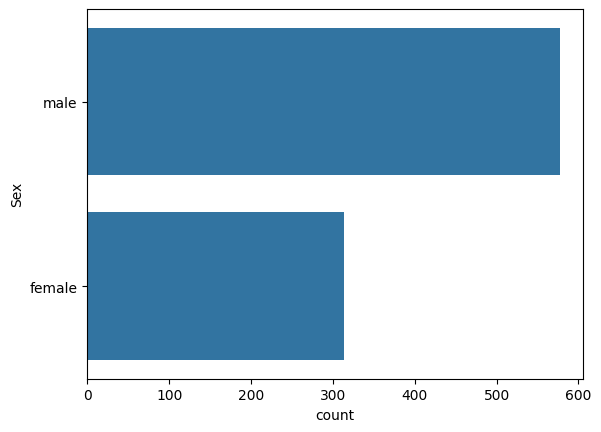

In [13]:
sns.countplot(df['Sex'])
df['Sex'].value_counts()

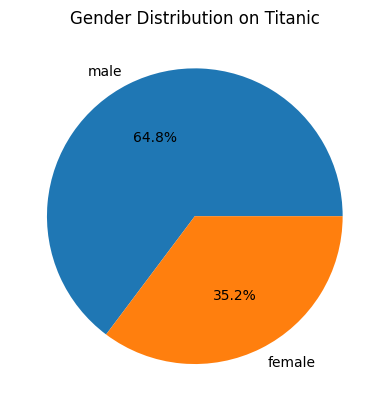

In [14]:
count = df['Sex'].value_counts()
plt.pie(count, labels=count.index, autopct='%1.1f%%')
plt.title('Gender Distribution on Titanic')
plt.show()

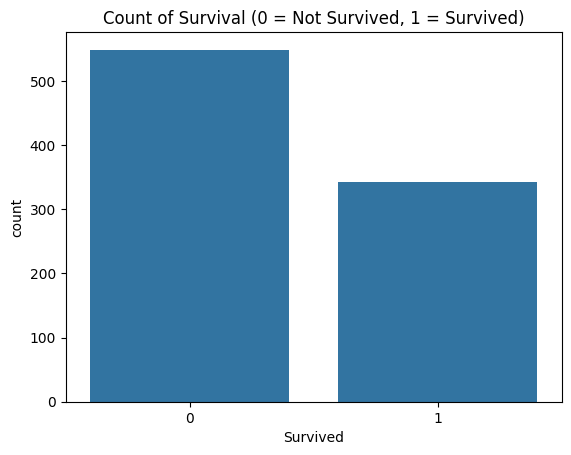

Survived
0    549
1    342
Name: count, dtype: int64

In [15]:
sns.countplot(x='Survived', data=df)
plt.title('Count of Survival (0 = Not Survived, 1 = Survived)')
plt.show()
df['Survived'].value_counts()

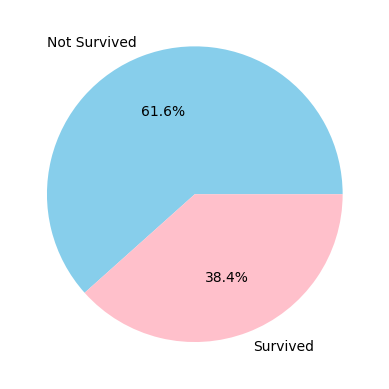

In [16]:
counts = df['Survived'].value_counts()
plt.pie(counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', colors=['skyblue', 'pink'])
plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

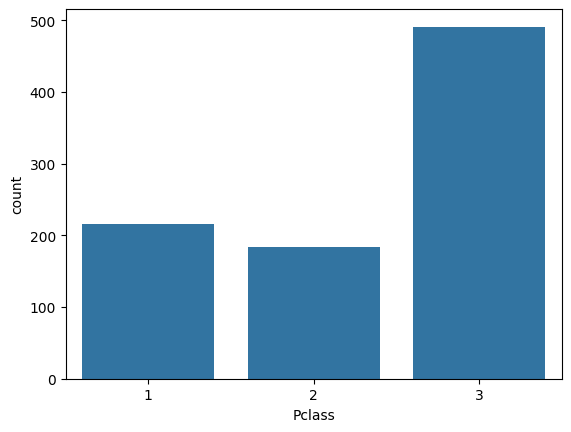

In [17]:
sns.countplot(x='Pclass', data=df)

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

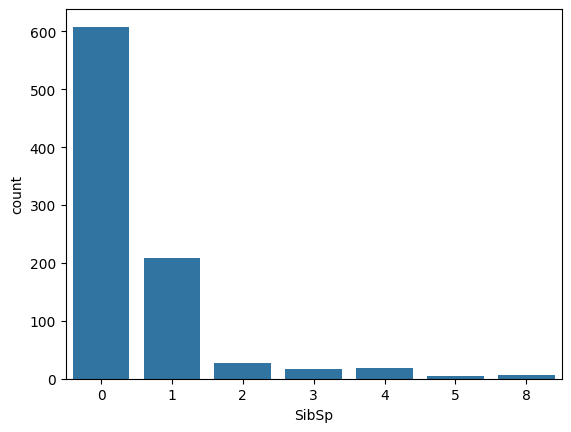

In [18]:
sns.countplot(x='SibSp', data=df)
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

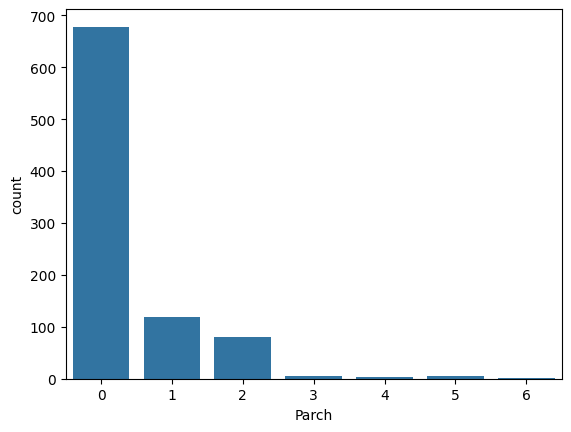

In [19]:
sns.countplot(x='Parch', data=df)
df['SibSp'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

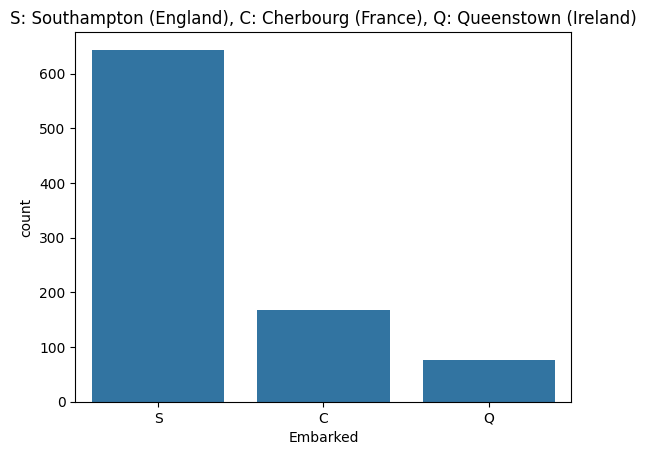

In [20]:
sns.countplot(x='Embarked', data=df)
plt.title('S: Southampton (England), C: Cherbourg (France), Q: Queenstown (Ireland)')
df['Embarked'].value_counts()

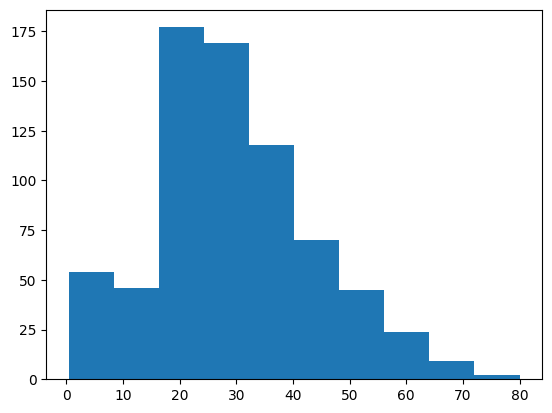

In [21]:
plt.hist(df['Age'])
plt.show()

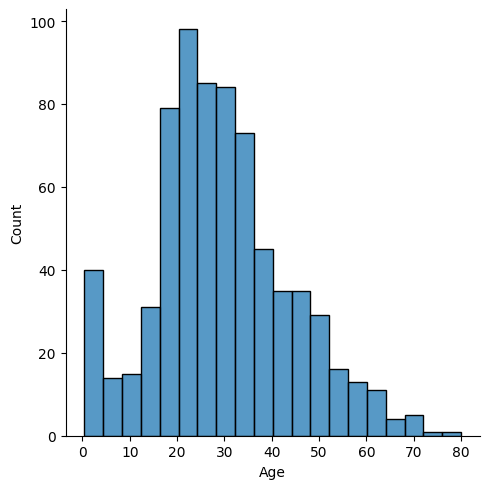

In [22]:
sns.displot(df['Age'])

<Axes: xlabel='Age'>

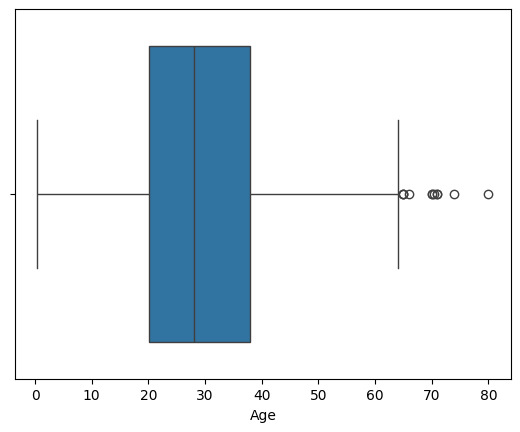

In [23]:
sns.boxplot(df['Age'], orient='h')

In [24]:
df['Age'].mean()

29.69911764705882

In [25]:
df['Age'].median()

28.0

In [26]:
df['Age'].min()

0.42

In [27]:
df['Age'].max()

80.0

In [28]:
df['Age'].std()

14.526497332334042

In [29]:
df['Age'].skew() #Positively Skewed

0.38910778230082704

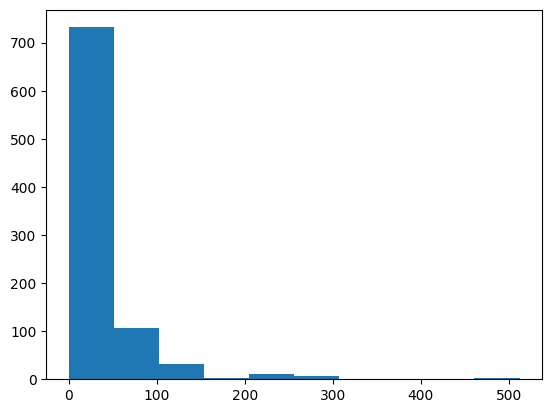

In [30]:
plt.hist(df['Fare'])
plt.show()

In [31]:
df['Fare'].max()

512.3292

In [32]:
df['Fare'].min()

0.0

In [33]:
df[df['Fare'] == 0.0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


<Axes: xlabel='Fare'>

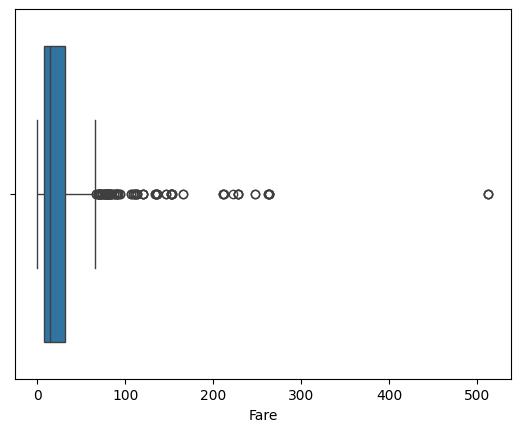

In [34]:
sns.boxplot(df['Fare'], orient='h')

In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Age', ylabel='Fare'>

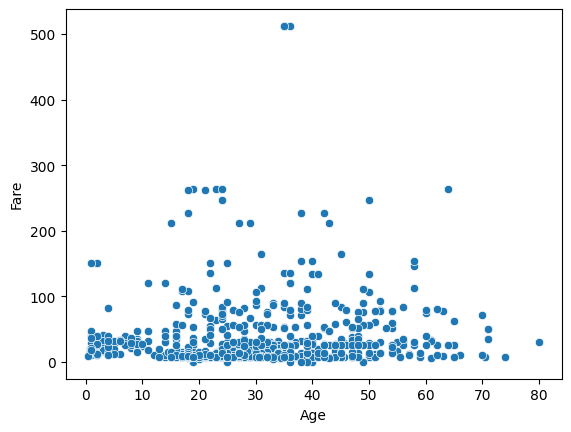

In [36]:
sns.scatterplot(df, x='Age', y='Fare')

<Axes: xlabel='Pclass', ylabel='Age'>

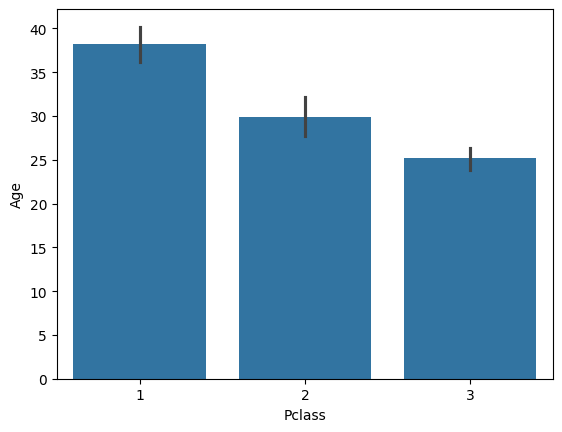

In [37]:
sns.barplot(df, x='Pclass', y='Age')

<Axes: xlabel='Sex', ylabel='Age'>

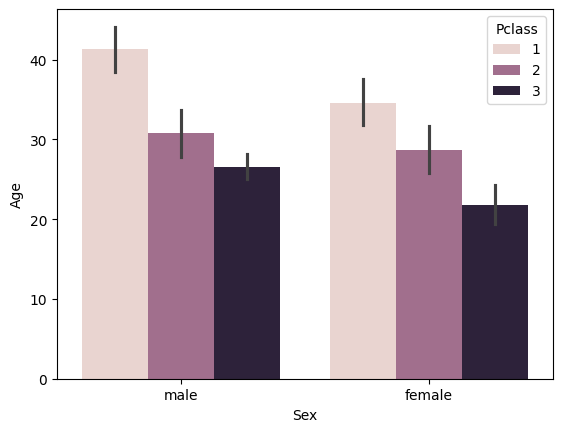

In [38]:
sns.barplot(df, x='Sex', y='Age', hue='Pclass')

<Axes: xlabel='Survived', ylabel='Age'>

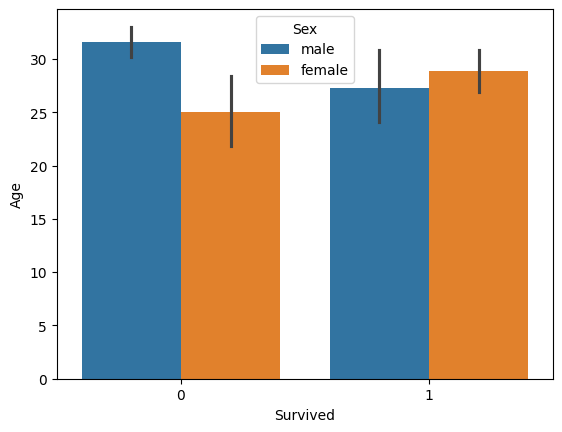

In [39]:
sns.barplot(df, x='Survived', y='Age', hue='Sex')

<Axes: xlabel='Pclass', ylabel='Fare'>

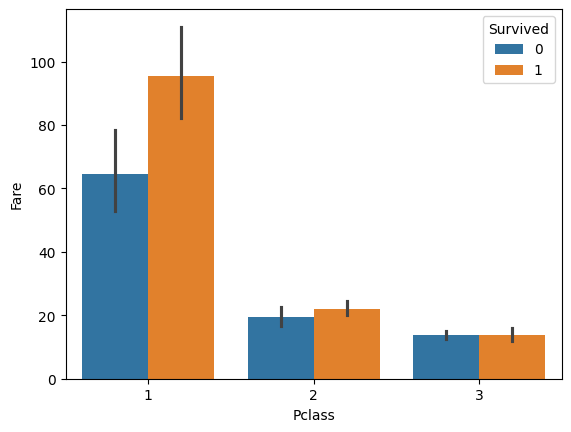

In [40]:
sns.barplot(df, x='Pclass', y='Fare', hue='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

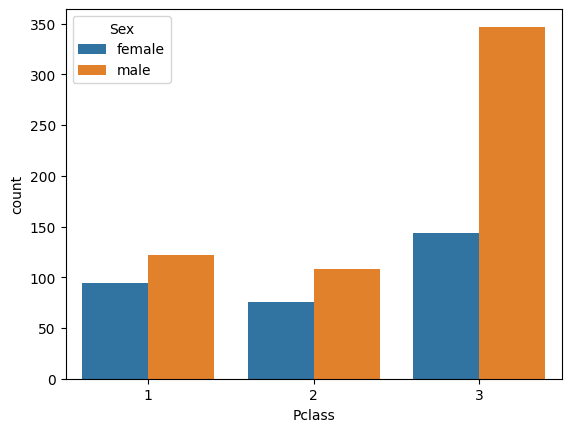

In [41]:
sns.countplot(df,x='Pclass',hue='Sex')

Text(0.5, 1.0, 'S: Southampton (England), C: Cherbourg (France), Q: Queenstown (Ireland)')

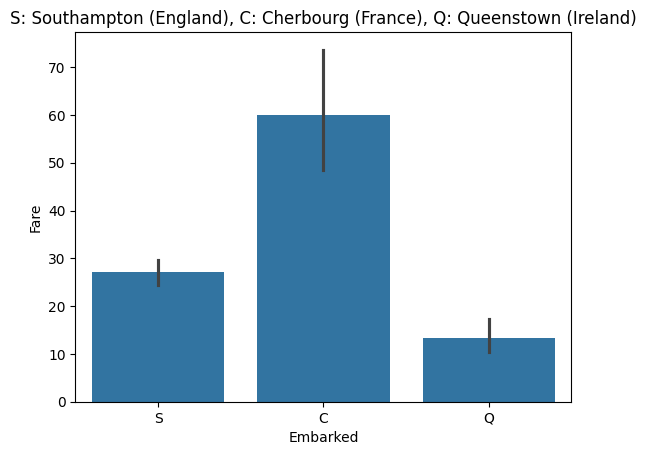

In [42]:
sns.barplot(df, x='Embarked', y='Fare')
plt.title('S: Southampton (England), C: Cherbourg (France), Q: Queenstown (Ireland)')

<Axes: xlabel='Survived', ylabel='Fare'>

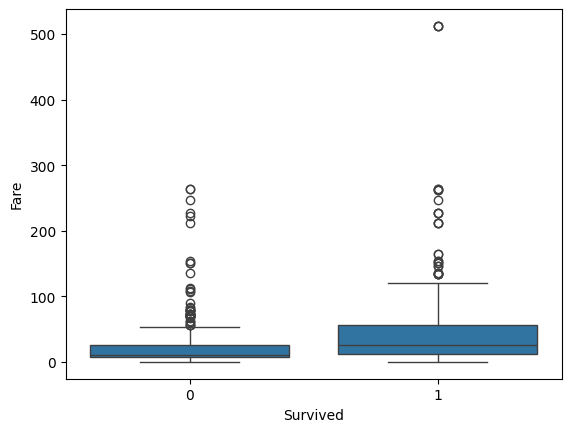

In [43]:
sns.boxplot(df, x='Survived', y='Fare')

In [44]:
pd.crosstab(df['Survived'], df['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


<Axes: xlabel='Pclass', ylabel='Survived'>

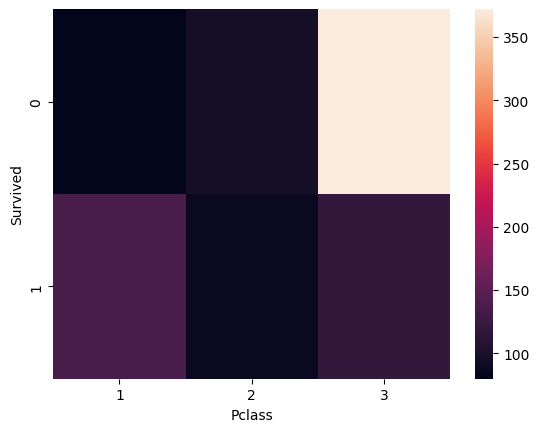

In [45]:
sns.heatmap(pd.crosstab(df['Survived'], df['Pclass']))

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [47]:
pd.crosstab(df['Survived'], df['Pclass'], normalize='index') * 100

Pclass,1,2,3
Survived,,,
0,14.571949,17.668488,67.759563
1,39.766082,25.438596,34.795322


In [48]:
num2_df = df[['Age', 'Survived', 'Fare', 'Pclass']]
num2_df

,Age,Survived,Fare,Pclass
0,22.0,0,7.2500,3
1,38.0,1,71.2833,1
2,26.0,1,7.9250,3
3,35.0,1,53.1000,1
4,35.0,0,8.0500,3
...,...,...,...,...
886,27.0,0,13.0000,2
887,19.0,1,30.0000,1
888,NaN,0,23.4500,3
889,26.0,1,30.0000,1


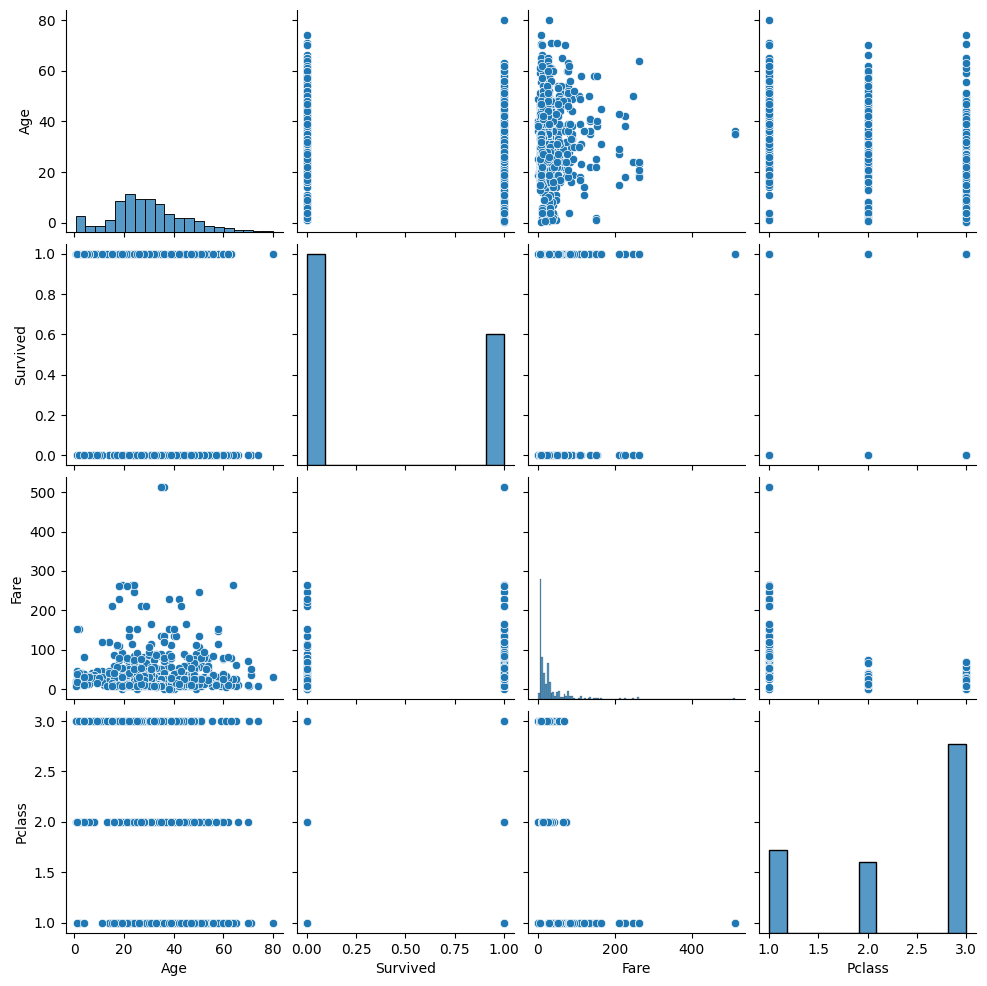

In [49]:
sns.pairplot(num2_df)

In [50]:
pd.pivot_table(df,values='Fare', index='Survived', columns='Pclass', aggfunc='mean')

Pclass,1,2,3
Survived,,,
0,64.684007,19.412328,13.669364
1,95.608029,22.055700,13.694887


In [51]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [52]:
df.groupby('Sex')['Survived'].mean() * 100

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [53]:
df.groupby('Pclass')['Survived'].mean() * 100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

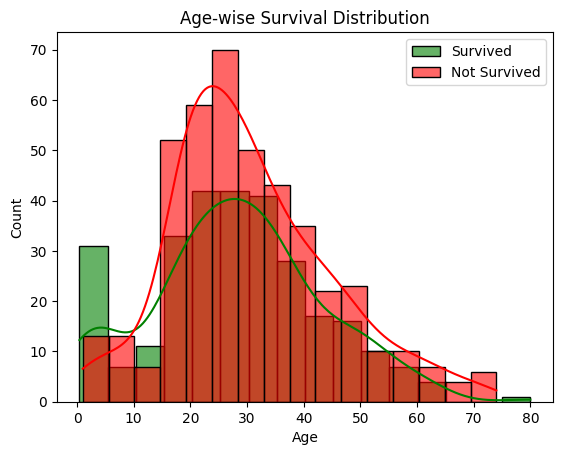

In [54]:
sns.histplot(df[df['Survived'] == 1]['Age'], kde=True, label='Survived', color='green', alpha=0.6)
sns.histplot(df[df['Survived'] == 0]['Age'], kde=True, label='Not Survived', color='red', alpha=0.6)
plt.legend()
plt.title('Age-wise Survival Distribution')
plt.show()

In [55]:
df[['Fare', 'Survived']].corr()

,Fare,Survived
Fare,1.000000,0.257307
Survived,0.257307,1.000000


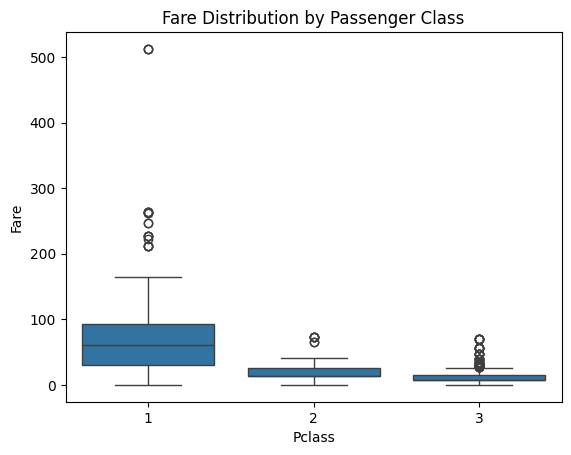

In [56]:
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Passenger Class')
plt.show()

In [57]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 #Add 1 bcz us bnde ko bhi add krlie
df.groupby('FamilySize')['Survived'].mean()

FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

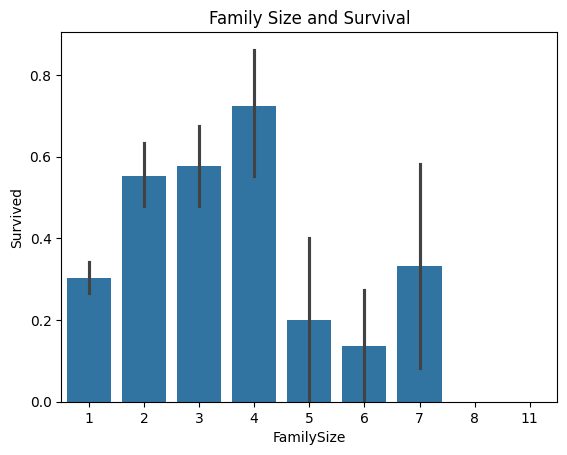

In [58]:
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Family Size and Survival')
plt.show()

In [59]:
df['HasCabin'] = df['Cabin'].notnull().astype(int)
df.groupby('HasCabin')['Survived'].mean()

HasCabin
0    0.299854
1    0.666667
Name: Survived, dtype: float64

In [60]:
df.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

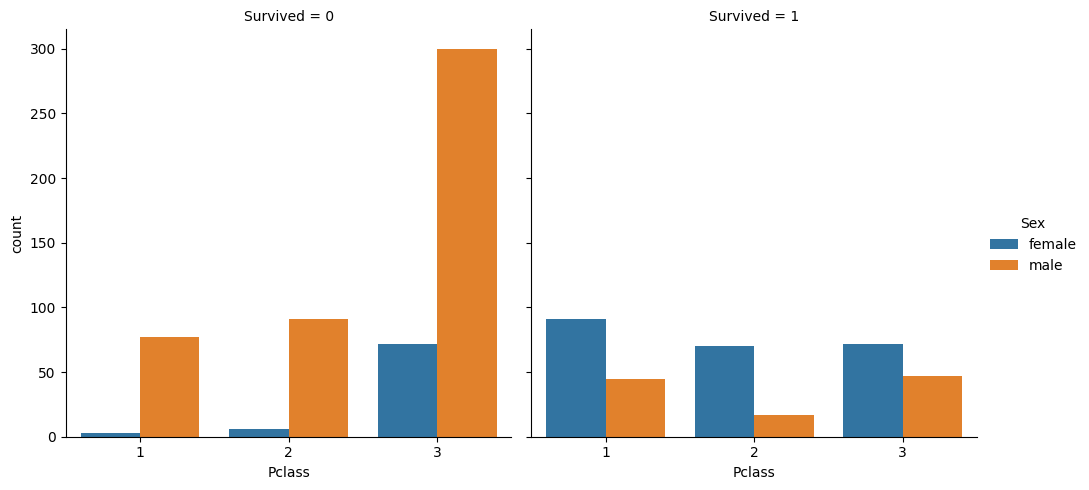

In [61]:
sns.catplot(x='Pclass', hue='Sex', col='Survived', data=df, kind='count')
plt.show()

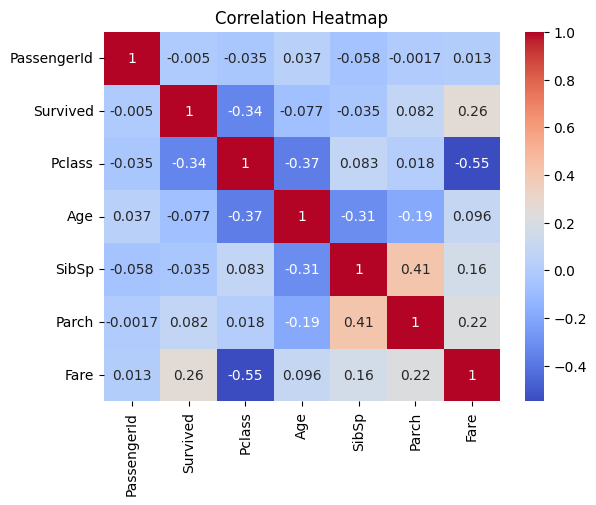

In [62]:
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()